done.


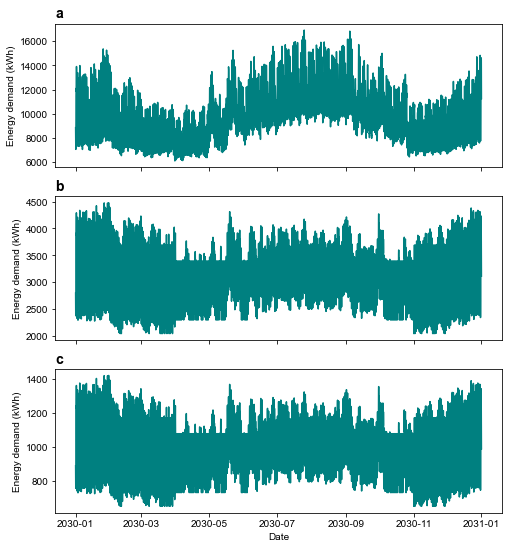

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['font.family']      = 'Arial'

basepath = '../data/nextra/nodal_flows/processed_flows_2030.csv'
data = pd.read_csv(basepath)
data['date'] = pd.to_datetime(data['date'])
data['palestine_energy_demand'] = data['west_bank_energy_demand'] + data['gaza_energy_demand']
data.head(3)

f,ax=plt.subplots(nrows=3,ncols=1,figsize=(8,9),sharex=True)

sns.lineplot(x='date',y='israel_energy_demand',data=data,color='teal',ax=ax[0])
ax[0].set_ylabel('Energy demand (kWh)')
ax[0].set_xlabel('Date')
ax[0].set_title('a',loc='left',fontweight='bold',fontsize=14)

sns.lineplot(x='date',y='jordan_energy_demand',data=data,color='teal',ax=ax[1])
ax[1].set_ylabel('Energy demand (kWh)')
ax[1].set_xlabel('Date')
ax[1].set_title('b',loc='left',fontweight='bold',fontsize=14)

sns.lineplot(x='date',y='palestine_energy_demand',data=data,color='teal',ax=ax[2])
ax[2].set_ylabel('Energy demand (kWh)')
ax[2].set_xlabel('Date')
ax[2].set_title('c',loc='left',fontweight='bold',fontsize=14)

#f.savefig('../../outputs/figures/supp_demand_curves.pdf',bbox_inches='tight')

print('done.')

In [11]:
data['jordan_energy_demand'].divide(24).min()

85.367433099915

In [8]:
data

,date,day,month,year,hour,israel_energy_demand,jordan_energy_demand,west_bank_energy_demand,gaza_energy_demand,israel_wind,israel_solar,jordan_wind,jordan_solar,west_bank_wind,west_bank_solar,gaza_wind,gaza_solar,palestine_energy_demand
0,2030-01-01 00:00:00,1,1,2030,0,8859.595337,2800.194382,705.993516,183.558314,0.93,0.0,0.19,0.0,0.9,0.0,0.9,0.0,889.551830
1,2030-01-01 01:00:00,1,1,2030,1,7969.387222,2590.607531,653.044002,169.791441,1.06,0.0,0.07,0.0,1.1,0.0,1.1,0.0,822.835443
2,2030-01-01 02:00:00,1,1,2030,2,7393.653331,2460.863291,620.265732,161.269090,1.10,0.0,0.02,0.0,1.1,0.0,1.1,0.0,781.534822
3,2030-01-01 03:00:00,1,1,2030,3,7120.323143,2379.594920,600.094488,156.024567,0.97,0.0,0.00,0.0,1.0,0.0,1.0,0.0,756.119055
4,2030-01-01 04:00:00,1,1,2030,4,7071.696861,2470.843617,622.787137,161.924656,0.88,0.0,0.00,0.0,0.9,0.0,0.9,0.0,784.711793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2030-12-31 19:00:00,31,12,2030,19,14626.962383,3939.377330,993.115852,258.210122,0.03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1251.325974
8756,2030-12-31 20:00:00,31,12,2030,20,14371.774580,3869.515047,975.714573,253.685789,0.05,0.0,0.11,0.0,0.1,0.0,0.1,0.0,1229.400362
8757,2030-12-31 21:00:00,31,12,2030,21,13557.819720,3688.443414,929.725478,241.728624,0.06,0.0,0.59,0.0,0.1,0.0,0.1,0.0,1171.454103
8758,2030-12-31 22:00:00,31,12,2030,22,12493.419970,3416.123085,861.363311,223.954461,0.05,0.0,0.29,0.0,0.1,0.0,0.1,0.0,1085.317772


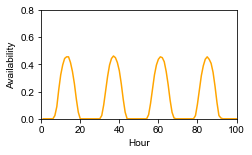

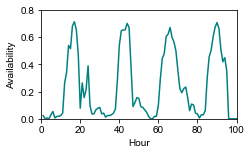

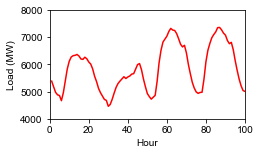

In [46]:
month = 6

color_dict = {'israel_solar'             : 'orange',
              'israel_wind'              : 'teal',
              'israel_energy_demand'     : 'red',}

y_limits = {'israel_solar'             : [0,0.8],
            'israel_wind'              : [0,0.8],
            'israel_energy_demand'     : [4000,8000],}

y_labels = {'israel_solar'             : 'Availability',
            'israel_wind'              : 'Availability',
            'israel_energy_demand'     : 'Load (MW)',}


subset_of_data = data.loc[(data.month==month)]
subset_of_data = subset_of_data.reset_index(drop=True)
subset_of_data['timestep'] = subset_of_data.index + 1


for k in color_dict.keys():
    # x,y
    x = subset_of_data.timestep.values
    y = subset_of_data[k].values * 0.6
    plt.figure(figsize=(3.5,2))
    plt.plot(x,y,color=color_dict[k])
    plt.xlim([0,100])
    plt.ylim(y_limits[k])
    plt.ylabel(y_labels[k])
    plt.xlabel('Hour')
    plt.savefig('../outputs/figures/schema_' + k + '.png',bbox_inches='tight')